Using device: cuda

--------------------------------------------------
Step 1: Scraping Math Website
--------------------------------------------------
Starting web scraping...
Scraped: Mathematics (9743 chars)
Scraped: Number (10822 chars)
Scraped: Arithmetic (10770 chars)
Scraped: Number_theory (14522 chars)
Scraped: Algebra (13229 chars)
Scraped: Linear_algebra (6049 chars)
Scraped: Abstract_algebra (17846 chars)
Scraped: Polynomial (10910 chars)
Scraped: Equation (5984 chars)
Scraped: Quadratic_equation (7719 chars)
Scraped: Matrix_(mathematics) (9117 chars)
Scraped: Vector_space (8961 chars)
Scraped: Calculus (8553 chars)
Scraped: Derivative (17355 chars)
Scraped: Integral (9531 chars)
Scraped: Differential_equation (6861 chars)
Scraped: Multivariable_calculus (4759 chars)
Scraped: Limit_(mathematics) (6549 chars)
Scraped: Geometry (12671 chars)
Scraped: Euclidean_geometry (6693 chars)
Scraped: Trigonometry (8358 chars)
Scraped: Triangle (11503 chars)
Scraped: Circle (5339 chars)


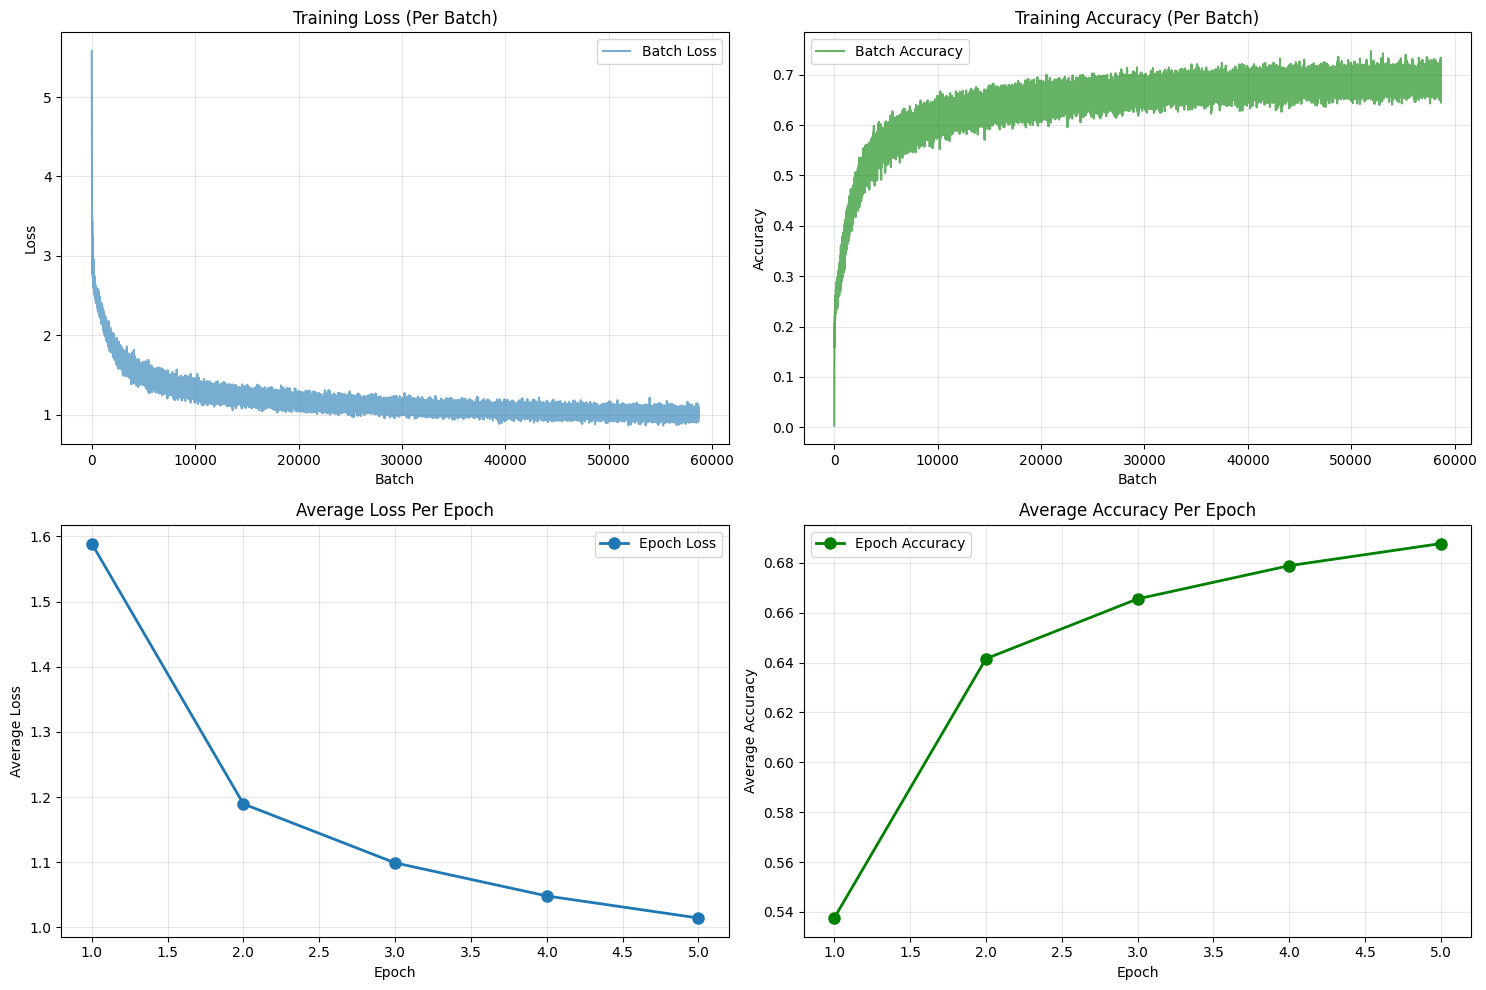


--------------------------------------------------
Step 5: Generating Sample Text
--------------------------------------------------

Prompt: 'The formula for '
Generated: The formula for instances e, in a set A, A, B, and C are grewn as enumerating the field of a general parameter of th
--------------------------------------------------

Prompt: 'In mathematics, '
Generated: In mathematics, and stochastic perpendicular fields of algebraic equations can be the exponentiation of and infinity
--------------------------------------------------

Prompt: 'To solve this equation, '
Generated: To solve this equation, exclusively, even its angles, a circle of the real numbers theory of definitions (see Herons) and in
--------------------------------------------------

Model saved to 'math_gpt_model.pt'
Training complete!
CPU times: user 16min 55s, sys: 3.9 s, total: 16min 59s
Wall time: 18min 10s


In [4]:
%%time
import torch
import torch.nn as nn
import torch.nn.functional as F
import requests
from bs4 import BeautifulSoup
import re
import time
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# -----------------------------web scraping-----------------------------

def scrape_math_problems():
    """
    Scrapes math problems from Simple Wikipedia math articles
    Falls back to sample data if scraping fails
    """
    all_text = []

    print("Starting web scraping...")

    # Try scraping from Simple Wikipedia (more reliable)
    topics = [
 # Foundational Math
        "https://en.wikipedia.org/wiki/Mathematics",
        "https://en.wikipedia.org/wiki/Number",
        "https://en.wikipedia.org/wiki/Arithmetic",
        "https://en.wikipedia.org/wiki/Number_theory",

        # Algebra
        "https://en.wikipedia.org/wiki/Algebra",
        "https://en.wikipedia.org/wiki/Linear_algebra",
        "https://en.wikipedia.org/wiki/Abstract_algebra",
        "https://en.wikipedia.org/wiki/Polynomial",
        "https://en.wikipedia.org/wiki/Equation",
        "https://en.wikipedia.org/wiki/Quadratic_equation",
        "https://en.wikipedia.org/wiki/Matrix_(mathematics)",
        "https://en.wikipedia.org/wiki/Vector_space",

        # Calculus
        "https://en.wikipedia.org/wiki/Calculus",
        "https://en.wikipedia.org/wiki/Derivative",
        "https://en.wikipedia.org/wiki/Integral",
        "https://en.wikipedia.org/wiki/Differential_equation",
        "https://en.wikipedia.org/wiki/Multivariable_calculus",
        "https://en.wikipedia.org/wiki/Limit_(mathematics)",

        # Geometry
        "https://en.wikipedia.org/wiki/Geometry",
        "https://en.wikipedia.org/wiki/Euclidean_geometry",
        "https://en.wikipedia.org/wiki/Trigonometry",
        "https://en.wikipedia.org/wiki/Triangle",
        "https://en.wikipedia.org/wiki/Circle",
        "https://en.wikipedia.org/wiki/Pythagorean_theorem",
        "https://en.wikipedia.org/wiki/Analytic_geometry",

        # Advanced Topics
        "https://en.wikipedia.org/wiki/Topology",
        "https://en.wikipedia.org/wiki/Real_analysis",
        "https://en.wikipedia.org/wiki/Complex_analysis",
        "https://en.wikipedia.org/wiki/Probability_theory",
        "https://en.wikipedia.org/wiki/Statistics",
        "https://en.wikipedia.org/wiki/Combinatorics",
        "https://en.wikipedia.org/wiki/Graph_theory",
        "https://en.wikipedia.org/wiki/Set_theory",
        "https://en.wikipedia.org/wiki/Logic",

        # Applied Math
        "https://en.wikipedia.org/wiki/Optimization_(mathematics)",
        "https://en.wikipedia.org/wiki/Numerical_analysis",
        "https://en.wikipedia.org/wiki/Fourier_analysis",
        "https://en.wikipedia.org/wiki/Discrete_mathematics",

        "https://math.stackexchange.com/questions/tagged/algebra",
        "https://math.stackexchange.com/questions/tagged/calculus",
        "https://math.stackexchange.com/questions/tagged/linear-algebra",
        "https://math.stackexchange.com/questions/tagged/number-theory",
        "https://math.stackexchange.com/questions/tagged/geometry",
        "https://math.stackexchange.com/questions/tagged/probability-and-statistics",
        "https://math.stackexchange.com/questions/tagged/combinatorics",
        "https://mathworld.wolfram.com/topics/Algebra.html",
        "https://mathworld.wolfram.com/topics/Calculus.html",
        "https://mathworld.wolfram.com/topics/NumberTheory.html",
        "https://www.mathsisfun.com/algebra/index.html",
        "https://www.mathsisfun.com/calculus/index.html",
        "https://www.mathsisfun.com/geometry/index.html",
        "https://www.mathsisfun.com/probability/index.html",
        "https://www.mathsisfun.com/combinatorics/index.html",
        "https://www.mathsisfun.com/number-theory/index.html",

    ]

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }

    for url in topics:
        try:
            response = requests.get(url, timeout=10, headers=headers)
            soup = BeautifulSoup(response.content, 'html.parser')

            # Extract paragraphs
            paragraphs = soup.find_all('p')
            text = ' '.join([p.get_text() for p in paragraphs[:20]])  # First 20 paragraphs

            # Clean the text
            text = re.sub(r'\[[0-9]+\]', '', text)  # Remove citation numbers
            text = re.sub(r'\s+', ' ', text).strip()

            if len(text) > 100:
                all_text.append(text)
                print(f"Scraped: {url.split('/')[-1]} ({len(text)} chars)")

            time.sleep(1)  # Be respectful to the server
        except Exception as e:
            print(f"Error scraping {url}: {e}")

    # Combine all text
    combined_text = "\n\n".join(all_text)

    # If scraping failed or got too little data, use sample data
    if len(combined_text) < 5000:
        print("\nScraping failed or insufficient data. Using sample mathematical text...")
        combined_text = get_sample_math_data()

    # Save to file
    with open('math_corpus.txt', 'w', encoding='utf-8') as f:
        f.write(combined_text)

    print(f"\nTotal characters collected: {len(combined_text)}")
    return combined_text


def get_sample_math_data():
    """Fallback sample data if scraping fails"""
    return """
    Mathematics is the study of numbers, shapes, and patterns.
    Algebra involves solving equations with variables.
    Geometry deals with shapes and spatial relationships.
    Calculus studies rates of change and accumulation.
    """ * 100


# ----------------------------TransformerBlock--------------------------------

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_embd = nn.Embedding(cfg["vocab_size"], cfg["n_embd"])
        self.pos_embd = nn.Embedding(cfg["block_size"], cfg["n_embd"])
        self.dropout = nn.Dropout(cfg["dropout"])
        self.trf_blocks = nn.Sequential(*[TransformerBlock(cfg)
        for i in range(cfg["n_layers"])])
        self.final_norm = LayerNorm(cfg["n_embd"])
        self.out_head = nn.Linear(cfg["n_embd"], cfg["vocab_size"])

    def forward(self, x):
        B, T  = x.shape
        token_embd = self.tok_embd(x)
        positional_embd = self.pos_embd(torch.arange(T, device=x.device))

        x = token_embd + positional_embd
        x = self.dropout(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

#----------------------------MultiHeadAttention--------------------------------

class MultiHeadAttention(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        assert cfg["n_embd"] % cfg["n_heads"] == 0
        self.d_head = cfg["n_embd"] // cfg["n_heads"]
        self.n_heads = cfg["n_heads"]
        self.w_query = nn.Linear(cfg["n_embd"], cfg["n_embd"])
        self.w_key = nn.Linear(cfg["n_embd"], cfg["n_embd"])
        self.w_value = nn.Linear(cfg["n_embd"], cfg["n_embd"])
        self.dropout = nn.Dropout(cfg["dropout"])
        self.w_out = nn.Linear(cfg["n_embd"], cfg["n_embd"])
        self.register_buffer("tril", torch.tril(torch.ones(cfg["block_size"],
                                                           cfg["block_size"])))

    def forward(self, x):
        B, T, C = x.shape
        q = self.w_query(x)
        k = self.w_key(x)
        v = self.w_value(x)

        q = q.view(B, T, self.n_heads, self.d_head).transpose(1,2)
        k = k.view(B, T, self.n_heads, self.d_head).transpose(1,2)
        v = v.view(B, T, self.n_heads, self.d_head).transpose(1,2)

        attn_s = q @ k.transpose(-2, -1)
        attn_s = attn_s.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attn_w = F.softmax(attn_s / k.shape[-1]**0.5, dim=-1)
        attn_w = self.dropout(attn_w)

        context = attn_w @ v

        context = context.transpose(1, 2).contiguous().view(B, T, C)
        output = self.w_out(context)
        return output

#--------------------TransformerBlock---------------------------------------

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.attn = MultiHeadAttention(cfg)
        self.ffwd = FeedForward(cfg)
        self.ln1 = LayerNorm(cfg["n_embd"])
        self.ln2 = LayerNorm(cfg["n_embd"])
        self.dropout = nn.Dropout(cfg["dropout"])

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return self.dropout(x)

#--------------------LayerNormalization--------------------------------------

class LayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        self.eps = eps
        self.scale = nn.Parameter(torch.ones(normalized_shape))
        self.bias = nn.Parameter(torch.zeros(normalized_shape))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        std = x.std(dim=-1, keepdim=True)
        norm = (x - mean) / (std + self.eps)
        return self.scale * norm + self.bias

#-------------------Gelu-activation function------------------------------------

class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0/torch.pi))*(x + 0.044715 * torch.pow(x,3))))

#---------------------Feedforward-network-------------------------------------

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["n_embd"], 4*cfg["n_embd"]),
            GELU(),
            nn.Linear(4*cfg["n_embd"], cfg["n_embd"])
        )

    def forward(self, x):
        return self.layers(x)


# ---------------------------------DataPreparation-----------------------------

class MathDataset(Dataset):
    def __init__(self, text, block_size):
        self.block_size = block_size

        # Create character-level vocabulary
        chars = sorted(list(set(text)))
        self.vocab_size = len(chars)

        self.char_to_idx = {ch: i for i, ch in enumerate(chars)}
        self.idx_to_char = {i: ch for i, ch in enumerate(chars)}

        # Encode the entire text
        self.data = torch.tensor([self.char_to_idx[c] for c in text], dtype=torch.long)

        print(f"Vocabulary size: {self.vocab_size}")
        print(f"Dataset size: {len(self.data)} characters")

    def __len__(self):
        return max(0, len(self.data) - self.block_size)

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.block_size]
        y = self.data[idx + 1:idx + self.block_size + 1]
        return x, y


# -----------------------------Training----------------------------------------

def train_model(model, train_loader, cfg, device):
    model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=cfg["learning_rate"])

    model.train()
    total_steps = 0

    # Track metrics
    train_losses = []
    train_accuracies = []
    epoch_losses = []
    epoch_accuracies = []

    print("\nStarting training...")
    start_time = time.time()

    for epoch in range(cfg["epochs"]):
        total_loss = 0
        total_correct = 0
        total_tokens = 0

        for batch_idx, (x, y) in enumerate(train_loader):
            x, y = x.to(device), y.to(device)

            # Forward pass
            logits = model(x)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), y.view(-1))

            # Calculate accuracy
            predictions = torch.argmax(logits, dim=-1)
            correct = (predictions == y).sum().item()
            total_correct += correct
            total_tokens += y.numel()

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_steps += 1

            # Store metrics per batch
            train_losses.append(loss.item())
            batch_accuracy = correct / y.numel()
            train_accuracies.append(batch_accuracy)

            # Print progress
            if batch_idx % 50 == 0:
                elapsed = time.time() - start_time
                print(f"Epoch {epoch+1}/{cfg['epochs']} | Batch {batch_idx}/{len(train_loader)} | "
                      f"Loss: {loss.item():.4f} | Acc: {batch_accuracy:.4f} | Time: {elapsed:.1f}s")

            # Stop if 30 minutes elapsed
            if time.time() - start_time > 1800:  # 30 minutes
                print("\n30 minutes reached, stopping training...")
                plot_training_curves(train_losses, train_accuracies, epoch_losses, epoch_accuracies)
                return model

        avg_loss = total_loss / len(train_loader)
        avg_accuracy = total_correct / total_tokens
        epoch_losses.append(avg_loss)
        epoch_accuracies.append(avg_accuracy)

        print(f"\nEpoch {epoch+1} completed | Avg Loss: {avg_loss:.4f} | Avg Acc: {avg_accuracy:.4f}")

    # Plot training curves
    plot_training_curves(train_losses, train_accuracies, epoch_losses, epoch_accuracies)

    return model


def plot_training_curves(train_losses, train_accuracies, epoch_losses, epoch_accuracies):
    """Plot loss and accuracy curves"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Batch-level loss
    axes[0, 0].plot(train_losses, alpha=0.6, label='Batch Loss')
    axes[0, 0].set_xlabel('Batch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training Loss (Per Batch)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Batch-level accuracy
    axes[0, 1].plot(train_accuracies, alpha=0.6, color='green', label='Batch Accuracy')
    axes[0, 1].set_xlabel('Batch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_title('Training Accuracy (Per Batch)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Epoch-level loss
    if epoch_losses:
        axes[1, 0].plot(range(1, len(epoch_losses) + 1), epoch_losses,
                       marker='o', linewidth=2, markersize=8, label='Epoch Loss')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Average Loss')
        axes[1, 0].set_title('Average Loss Per Epoch')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # Epoch-level accuracy
    if epoch_accuracies:
        axes[1, 1].plot(range(1, len(epoch_accuracies) + 1), epoch_accuracies,
                       marker='o', linewidth=2, markersize=8, color='green', label='Epoch Accuracy')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Average Accuracy')
        axes[1, 1].set_title('Average Accuracy Per Epoch')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')
    print("\nTraining curves saved to 'training_curves.png'")
    plt.show()


def generate_text(model, dataset, prompt, max_tokens, device):
    model.eval()

    # Encode the prompt
    context = torch.tensor([dataset.char_to_idx[c] for c in prompt],
                          dtype=torch.long).unsqueeze(0).to(device)

    generated = prompt

    with torch.no_grad():
        for _ in range(max_tokens):
            # Crop context if too long
            context_crop = context[:, -model.pos_embd.num_embeddings:]

            # Get predictions
            logits = model(context_crop)
            logits = logits[:, -1, :]  # Get last token predictions

            # Sample from distribution
            probs = F.softmax(logits, dim=-1)
            next_idx = torch.multinomial(probs, num_samples=1)

            # Append to context
            context = torch.cat([context, next_idx], dim=1)

            # Decode and append to generated text
            next_char = dataset.idx_to_char[next_idx.item()]
            generated += next_char

    return generated


# ----------------------MainExecution---------------------------------------

if __name__ == "__main__":
    # Configuration for small model (fits T4 GPU)
    cfg = {
        "vocab_size": None,  # Will be set after loading data
        "n_embd": 128,       # Small embedding dimension
        "n_heads": 4,        # Number of attention heads
        "n_layers": 4,       # Number of transformer blocks
        "block_size": 64,    # Context window-context length
        "dropout": 0.1,
        "learning_rate": 3e-4,
        "batch_size": 32,
        "epochs": 5
    }

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Step 1: Scrape data
    print("\n" + "-"*50)
    print("Step 1: Scraping Math Website")
    print("-"*50)
    text = scrape_math_problems()

    # Step 2: Prepare dataset
    print("\n" + "-"*50)
    print("Step 2: Preparing Dataset")
    print("-"*50)

    # Check if we have enough data
    if len(text) < 1000:
        print("ERROR: Not enough text data collected!")
        print("Using backup sample data...")
        text = get_sample_math_data()

    dataset = MathDataset(text, cfg["block_size"])
    cfg["vocab_size"] = dataset.vocab_size

    # Check dataset size
    if len(dataset) == 0:
        print("ERROR: Dataset is empty! Cannot proceed with training.")
        exit(1)

    train_loader = DataLoader(dataset, batch_size=cfg["batch_size"],
                             shuffle=True, num_workers=0)

    # Step 3: Initialize model
    print("\n" + "-"*50)
    print("Step 3: Initializing Model")
    print("-"*50)
    model = GPTModel(cfg)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total parameters: {total_params:,}")

    # Step 4: Train model
    print("\n" + "-"*50)
    print("Step 4: Training Model (max 30 minutes)")
    print("-"*50)
    model = train_model(model, train_loader, cfg, device)

    # Step 5: Generate sample text
    print("\n" + "-"*50)
    print("Step 5: Generating Sample Text")
    print("-"*50)

    prompts = [
        "The formula for ",
        "In mathematics, ",
        "To solve this equation, "
    ]

    for prompt in prompts:
        print(f"\nPrompt: '{prompt}'")
        generated = generate_text(model, dataset, prompt, max_tokens=100, device=device)
        print(f"Generated: {generated}")
        print("-" * 50)

    # Save model
    torch.save(model.state_dict(), 'math_gpt_model.pt')
    print("\nModel saved to 'math_gpt_model.pt'")
    print("Training complete!")